In [31]:
#include <iostream>

using namespace std;

# File I/O

Files are the lifeblood of the computer—without files, everything a computer does would ultimately be
impermanent, lasting only until the user reboots—or the application terminates

C++, naturally, has the
ability to read and write into files. Working with files is known as file I/O (I/O stands for input and
output)

## File I/O basics

Unlike cin and cout, which are global variables, you have to declare your own objects to read and write from files. This means you
need to know the actual types

The two data types are the **ifstream** and the **ofstream**. 

The names stand for input file stream and output file stream. 

A stream is just a bunch of data that you can read from or write to. 
What these types do is take a file, and turn it into a long stream of data that you can access, as though you were interacting with the user. 

Both of these types require the fstream header file (fstream stands for file stream)


## Reading from files

We can initialize an ifstream instance with the name of a file that we want to read from. Once the file is open, you can use an ifstream just like you would use cin. This code reads a number from a text file. When you work with files, you have no choice but to write code that handles possible failures. 

In [32]:
#include <fstream>

ifstream file_reader( "README.md" ); //Change the name and see the could not open error pop up

if(!file_reader.is_open())
{
    cout << "Could not open the file!";
}

int number;
// here, we're checking if reading in an integer succeeded or not
if ( file_reader >> number )
{
    cout << "The value is: " << number;
}
else
{
    cout << "No number could be read!";
}

No number could be read!


if the file had the text
12 a b c
Then number would store 12 after the program ran

## File formats

A file format is the layout of the file.

A good principle when working with file formats, called Postel’s Law, is: “Be liberal in what you accept, and conservative in what you send.”

In other words, code that produces a file should be very careful to follow the specification, but code that reads the file format should be robust to small errors made by less well-written programs.

Example of Robust File reading: [Link](../volansys_cpp_advanced/16_File_IO/read_highscores.cpp) 

## End of file

There is eof() method to detect end of file
There is also fail() method to detect errors during reading the file

Example [LINK](../volansys_cpp_advanced/16_File_IO/read_eof_fail.cpp)




## Writing files

The type we need to use for writing files is called the ofstream, which stands for output file stream.

Demo: [LINK](../volansys_cpp_advanced/16_File_IO/write_highscores.cpp)

## Creating new files

When you use an ofstream to write to a file, by default, it will create the file if the file does not already
exist, or overwrite it if it does. 

The ofstream constructor takes a second argument that specifies how the file should be handled:

|  ios::app   |       Append to the file, setting the position to the end after each write       |
|:-----------:|:--------------------------------------------------------------------------------:|
|   ios::ate  |                        Set the current position to the end                       |
|  ios::trunc |                    Delete everything in the file (truncate it)                   |
|   ios::out  |                              Allow output to the file                            |
| ios::binary |  Allow binary operations on the stream (also available when reading from a file) |

If you want to select multiple options, for example opening a file for appending and using binary IO
(which we'll cover soon), you can combine the options with the pipe (|)

```ofstream a_file( "test.txt", ios::app | ios::binary );```

## File position

When a program reads to a file (or writes into a file), the file I/O code needs to know where the read or
write will take place. Think of it like the cursor on your screen, telling you where the next character you
type will show up.

There are actually two different positions in the file
- one for where the program will next read and 
- one for where the program will next write.

You can get your current position using the tellg and tellp methods. These give you the current position for reading (g stands for get) and writing (p stands for put)

You can also set your position in the file, moving from your current position, by using seekp and seekg. As you probably guessed from the names, moving around in a file is called seeking. 

The three flags for the position in the file are:

| ios_base::beg  | Seek from the beginning of the file |
|:--------------:|:-----------------------------------:|
| ios_base::cur  |    Seek from the current position   |
| ios_base::end  |    Seek from the end of the file    |

For example, to move to the start of the file before writing it, you could say:

```file_writer.seekp( 0, ios_base::beg );```

The value returned from tellp and tellg is a special variable type called streampos, defined by the standard library.

```streampos pos = file_reader.tellg();```

When you add new data into a file, it is much faster to add to the end of the file than insert into the middle of the file. The problem with inserting into the middle is that you have to move everything in the file that comes after the place you’re inserting into—just like inserting an element into the middle of an array.

Example File Positions: [LINK](../volansys_cpp_advanced/16_File_IO/file_pos_highscores.cpp)

## Accepting command line arguments

When writing programs that interact with files, you often want to let users provide the file name as an argument on the command line. 

Command line arguments are passed directly into your main function—to use command line arguments, you must provide the full declaration of the main function (previously all the main functions we’ve seen have had an empty argument list).

In fact, main takes two parameters: one parameter is the number of command line arguments, and the other parameter is a full list of all of the command line arguments

The full declaration of main looks like this:

```int main (int argc, char *argv[])```

The integer, ```argc```, is the argument count. It is the number of arguments passed into the program from the command line, including the name of the program

The array of character pointers is the listing of all the arguments. 
- argv[ 0 ] is the name of the program, or an empty string if the name is not available. 
- After that, every element number less than argc is a command line argument. You can use each argv element just like a string. 
- argv[ argc ] is a NULL pointer.

Example: [LINK](../volansys_cpp_advanced/16_File_IO/command_line_args.cpp)

### Dealing with numeric command line arguments

If you wish to take a command line parameter and use it as a number, you can do so by reading it as a string and calling the atoi function (atoi stands for ASCII to integer).

The atoi function takes a char* and returns the integer represented by the string, and you must include the cstdlib header to use it

Example: [LINK](../volansys_cpp_advanced/16_File_IO/command_line_numeric.cpp)





## Binary file I/O

working with binary files, which are often used for maximal efficiency.

Example of Raw Binary Data:

```
struct player
{
int age;
int high_score;
string name;
};
```

Binary file formats use less space. In the example above, we saw that storing the number 120000 in characters takes 50% more space than using the binary representation.

### Working with binary files

Step one is to open a file in binary mode:

```ofstream a_file( "test.bin", ios::binary );```

Once the file is open, you can't use the input and output functions we've used before—we'll need to use functions that are specific to working with binary data

We need to write bytes directly into the file from a block of memory. The method that we will use is called write, and it takes a pointer to a block of memory and the size of memory to write into the file. 

The pointer type is a char*, but your data doesn't have to be characters. So why are we using a char? In C++, the way to work with individual bytes is to use a single byte variable, the char, or a pointer to a series of bytes, the char*. (usigned char* may be more preferred)

To write an integer into a file, we need a way of referring directly to this set of bytes. That’s why we use a char*: it isn’t for its ability to represent ASCII characters; it’s for its ability to work with bytes.

#### Converting to char*, TYPE CASTING in C++
So how do we tell the compiler to treat a variable as a pointer to a char, rather than a pointer to its true type? 
Asking the compiler to treat a variable as a different type is called typecasting. 

The two most basic typecasts are **static_cast** and **reinterpret_cast**. 

1. A static_cast is used when you want to cast between related types—for example, telling the compiler to treat a double as an integer so that you can truncate it—e g. 
```static_cast<int>( 3.4 ) ```
The type being cast to is provided in brackets after the name of the cast. 

2. A reinterpret_cast
In this case, though, we want to completely ignore the type system and have the compiler reinterpret a series of bytes as belonging to a totally different type. To achieve this feat, we need reinterpret_cast:
```
int x[ 10 ];
reinterpret_cast<char*>( x );
```

By the way, working with binary data is one of the few places where a reinterpret_cast is a good idea. 

Whenever you see a reinterpret_cast, be suspicious! It is a powerful way of making the compiler to do things that it normally wouldn’t do, and, as a result, the compiler will not check the code that uses the cast as carefully as it checks other code. 

### An example of binary I/O

Example: [LINK](../volansys_cpp_advanced/16_File_IO/binary_io.cpp)

## Storing classes in a file

- String Object in C++ :
    + The string type is implemented as a pointer to a string (possibly along with some other data, such as the length of the string). 
    + When we write out the struct as binary data, it will write out what is stored directly in the string—the pointer and the length. 
    + But this pointer is only meaningful while your program is running! The actual pointer value—the memory address—isn’t useful once your program quits because there’s no longer anything at that address. 
    + The next time someone reads in the structure, it will get a pointer that points to memory that hasn't been properly allocated, or that points to data that has nothing to do with the string.

Solution:
```
int len = rec.name.length();
a_file.write( reinterpret_cast<char*>( & len ), sizeof( len ) );
a_file.write( rec.name.c_str(), len + 1 ); // + 1 for the null terminator
```

## Reading from a file
To read back from a binary file, we will use the aptly named read method.

- For int 
```
int x = 3;
a_file.read( reinterpret_cast<char*>( & x ), sizeof( x ) );
```

- For struct:
```
a_file.seekg( 0, ios::beg );
PlayerRecord in_rec;
if ( ! a_file.read( reinterpret_cast<char*>( & in_rec.age ), sizeof(in_rec.age ) ) )
{
    // handle error
}
if ( ! a_file.read( reinterpret_cast<char*>( & in_rec.score ), sizeof( in_rec.score ) ) )
{
    // handle error
}
```

- For char*
```
int str_len;
if ( ! a_file.read( reinterpret_cast<char*>( & str_len ), sizeof( str_len ) ))
{
    // handle error
}
// perform a sanity check to ensure we don't try to allocate too much
// memory!
else if ( str_len > 0 && str_len < 10000 )
{
    char *p_str_buf = new char[ str_len ];
    if ( ! a_file.read( p_str_buf, str_len + 1 ) ) // + 1 for null terminator
    {
        // handle error
    }
    // validate that the string is null-terminated
    if ( p_str_buf[ str_len ] == 0 )
    {
        in_rec.name = string( p_str_buf );
    }
    delete p_str_buf;
}
cout << in_rec.age << " " <<in_rec.score << " " << in_rec.name << endl;
```

Whole Working code: [LINK](../volansys_cpp_advanced/16_File_IO/binary_read_structs.cpp)



# Formatting Output using Iomanip

In C++, you can create nicely formatted output with ```cout``` by using functions in the iomanip header file.

## Dealing with spacing issues
#### Setting the field width with setw
The setw function allows you to set the minimum width of the next output via the insertion operator. 

```
#include <iomanip>
```

In [33]:
#include <iomanip>

cout << setw( 10 ) << "ten" << "four" << "four";

       tenfourfour

The setfill manipulator in C++ is used to set the fill character used for padding when the width of the output field is greater than the width of the content. 

In [34]:
std::cout << std::setw(10) << std::setfill('*') << 42 << std::endl;
std::cout << std::setw(10) << std::setfill('-') << "Hello" << std::endl;
std::cout << std::setw(15) << std::setfill('@') << 123.45 << std::endl;


******0x2a
-----Hello
@@@@@@@@@@@@123


- ```std::setw(10)``` sets the width of the field to 10 characters.
- ```std::setfill('*'), std::setfill('-'), and std::setfill('@')``` set the fill character to '*', '-', and '@' respectively.

#### Permanently changing settings
In C++, cout.fill() is a member function of the ostream class that sets the fill character used when padding is necessary. The fill character is the character that fills the space when the width of the output field is greater than the width of the content.

You can also globally change the padding character using the fill member function on cout. For
example, this code:

In [35]:
cout.fill( '-' );
cout << setw( 10 ) << "A" << setw( 10 ) << "B" << setw( 10 ) << "C" << endl;

---------A---------B---------C


The fill method returns the previous fill character, so that you can restore it later. This return value is
useful if all you’re doing is avoiding multiple setfill calls. For example:

In [36]:
const char last_fill = cout.fill('-');
cout << setw( 10 ) << "A" << setw( 10 ) << "B" << setw( 10 ) << "C" << endl;
cout.fill( last_fill );  //Resets the fill to spaces
cout << setw( 10 ) << "D" << endl;

---------A---------B---------C
---------D



In C++, std::ios::setf is a member function provided by the std::ios class that is part of the iostream library. It is used to set various format flags that control the formatting of input and output operations on streams, such as std::cout and std::cin.

You can permanently set the alignment of padded text by calling the setf member function of cout.
You can pass in flags to the setf function for left or right with the flags ios_base::left or
ios_base::right.

In [37]:
cout.setf( ios_base::right );
cout << setw( 10 ) << "A" << setw( 10 ) << "B" << setw( 10 ) << "C" << endl;
cout << "hwllo wassup";

---------A---------B---------C
hwllo wassup

### Putting your knowledge of iomanip together

Example: [LINK](../volansys_cpp_advanced/16_File_IO/demo_Iomanip.cpp)

### Printing numbers

#### Setting the precision of numerical output with setprecision



In [38]:
cout << setprecision( 3 ) << 2.71828 << endl;
cout << 1.412 << endl;

2.72
1.41


#### Rupees and Paisa

In [39]:
//Paisa to rupees
int paisa = 1001; // Rupees 10.01
cout << paisa / 100 << "." << paisa % 100;

0xa.0x1

#### Output in different bases

Hexadecimal example:

In [40]:
cout << setbase( 16 ) << 32 << endl;

0x20


you can use setiosflags to indicate that cout should
display the base automatically. If you pass the result of setiosflags( ios_base::showbase ) into
cout, then decimal numbers will be displayed normally, hex numbers will be prefixed with 0x, and octal
numbers will be prefixed with 0.

Like setprecision, the changes made by setiosflags are permanent. You can disable the prefix
using noshowbase as an argument.

In [41]:
cout << setiosflags( ios_base::showbase ) << setbase( 16 ) << 32 << endl;

0x20


# Manipulators in C++ with Examples

Manipulators are helping functions that can modify the input/output stream. It does not mean that we change the value of a variable, it only modifies the I/O stream using insertion (<<) and extraction (>>) operators. 

- Manipulators are special functions that can be included in the I/O statement to alter the format parameters of a stream. 
- Manipulators are operators that are used to format the data display.
- To access manipulators, the file iomanip.h should be included in the program.

## Types of Manipulators There are various types of manipulators:

### Manipulators without arguments: 

The most important manipulators defined by the IOStream library are provided below.
1. endl: It is defined in ostream. It is used to enter a new line and after entering a new line it flushes (i.e. it forces all the output written on the screen or in the file) the output stream.
2. ws: It is defined in istream and is used to ignore the whitespaces in the string sequence.
3. ends: It is also defined in ostream and it inserts a null character into the output stream. It typically works with std::ostrstream, when the associated output buffer needs to be null-terminated to be processed as a C string.
4. flush: It is also defined in ostream and it flushes the output stream, i.e. it forces all the output written on the screen or in the file. Without flush, the output would be the same, but may not appear in real-time.

Example [LINK](../volansys_cpp_advanced/16_File_IO/manipulators_wo_args.cpp)

#### Manipulators with Arguments: 
Some of the manipulators are used with the argument like ```setw (20), setfill (‘*’),``` and many more. These all are defined in the header file. If we want to use these manipulators then we must include this header file in our program. 

For Example, you can use following manipulators to set minimum width and fill the empty space with any character you want: 

```std::cout << std::setw (6) << std::setfill (’*’);```

Some important manipulators in ```<iomanip>``` are:
- setw (val): It is used to set the field width in output operations.
- setfill (c): It is used to fill the character ‘c’ on output stream.
- setprecision (val): It sets val as the new value for the precision of floating-point values.
- setbase(val): It is used to set the numeric base value for numeric values.
- setiosflags(flag): It is used to set the format flags specified by parameter mask.
- resetiosflags(m): It is used to reset the format flags specified by parameter mask.


Some important manipulators in ```<ios>``` are:
- showpos: It forces to show a positive sign on positive numbers.
- noshowpos: It forces not to write a positive sign on positive numbers.
- showbase: It indicates the numeric base of numeric values.
- uppercase: It forces uppercase letters for numeric values.
- nouppercase: It forces lowercase letters for numeric values.
- fixed: It uses decimal notation for floating-point values.
- scientific: It uses scientific floating-point notation.
- hex: Read and write hexadecimal values for integers and it works same as the setbase(16).
- dec: Read and write decimal values for integers i.e. setbase(10).
- oct: Read and write octal values for integers i.e. setbase(10).
- left: It adjusts output to the left.
- right: It adjusts output to the right.


1) Parameterized Manipulators:-


|       Manipulator      | Meaning                            |
|:----------------------:|------------------------------------|
|      setw (int n)      | To set field width to n            |
|  setprecision (int p)  | The precision is fixed to p        |
| setfill (Char f)       | To set the character to be filled  |
| setiosflags (long l)   | Format flag is set to l            |
| resetiosflags (long l) | Removes the flags indicated by l   |
| Setbase(int b)         | To set the base of the number to b |


Reference Iomanip : [LINK](https://en.cppreference.com/w/cpp/io/manip)

# How To Read From a File in C++

## What Are C++ Streams?
The sequence of bytes given as input to the executing program and the sequence of bytes that comes as output from the executing program are called stream. In other words, streams are nothing but the flow of data in a sequence.

The input and output operation between the executing program and the devices like keyboard and monitor are known as “console I/O operation”. The input and output operation between the executing program and files are known as “disk I/O operation”.

### File Handling in C++
To read a character sequence from a text file, we’ll need to perform the following steps:

1. Create a stream object. 
2. Connect it to a file on disk. 
3. Read the file’s contents into our stream object. 
4. Close the file.

At each stage, our stream object may occupy different states, which we can check for using the following member functions:

- bad() returns True if an error occurred while reading from or writing to a stream. If a stream is “bad,” no further operations involving the stream are possible.
- fail() returns True if an error occurs, but we can still operate on the  stream.
- eof() returns True if the end of the file (EOF) is reached, with False returned otherwise.
- good() returns True if each of the other three states are false, i.e., the stream is neither bad nor failed, nor has it reached the end of the file. 

### Read a File in C++

1. Raw reading: [LINK](../volansys_cpp_advanced/16_File_IO/read_file2.cpp)
2. Reading using get(): [LINK](../volansys_cpp_advanced/16_File_IO/read_file3.cpp)
3. Reading using getline(): [LINK](../volansys_cpp_advanced/16_File_IO/read_file4.cpp)





# File Handling through C++ Classes

#### Classes for File stream operations

The I/O system of C++ contains a set of classes which define the file handling methods. These include ifstream, ofstream and fstream classes. These classes are derived from fstream and from the corresponding iostream class. These classes, designed to manage the disk files, are declared in fstream and therefore we must include this file in any program that uses files.
1. ios:-
- ios stands for input output stream.
- This class is the base class for other classes in this class hierarchy.
- This class contains the necessary facilities that are used by all the other derived classes for input and output operations.
2. istream:-

- istream stands for input stream.
- This class is derived from the class ‘ios’.
- This class handle input stream.
- The extraction operator(>>) is overloaded in this class to handle input streams from files to the program execution.
- This class declares input functions such as get(), getline() and read().
 
3. ostream:-

- ostream stands for output stream.
- This class is derived from the class ‘ios’.
- This class handle output stream.
- The insertion operator(<<) is overloaded in this class to handle output streams to files from the program execution.
- This class declares output functions such as put() and write().
4. streambuf:-

- This class contains a pointer which points to the buffer which is used to manage the input and output streams.
5. fstreambase:-

- This class provides operations common to the file streams. Serves as a base for fstream, ifstream and ofstream class. 
- This class contains open() and close() function.
6. ifstream:-

- This class provides input operations.
- It contains open() function with default input mode. 
- Inherits the functions get(), getline(), read(), seekg() and tellg() functions from the istream.
7. ofstream:-

- This class provides output operations.
- It contains open() function with default output mode. 
- Inherits the functions put(),  write(), seekp() and tellp() functions from the ostream.
8. fstream:-

- This class provides support for simultaneous input and output operations.
- Inherits all the functions from istream and ostream classes through iostream.
9. filebuf:-

- Its purpose is to set the file buffers to read and write.
- We can also use file buffer member function to determine the length of the file.

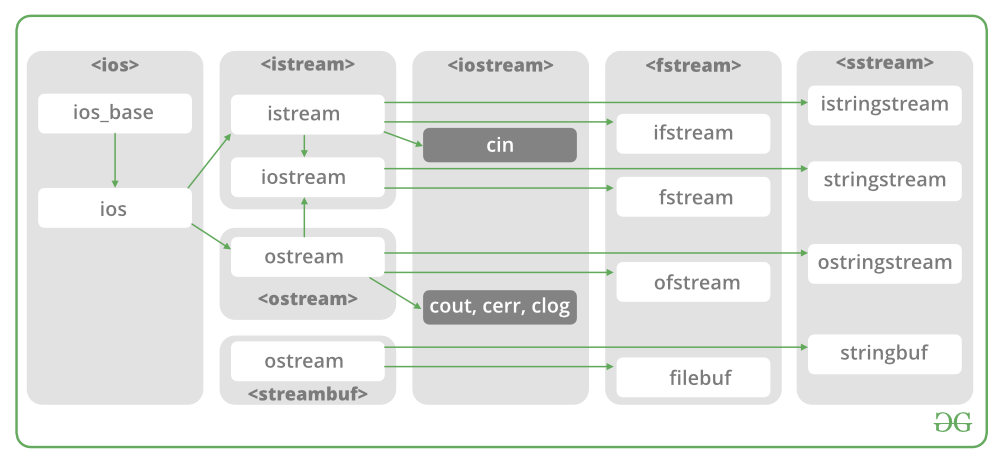

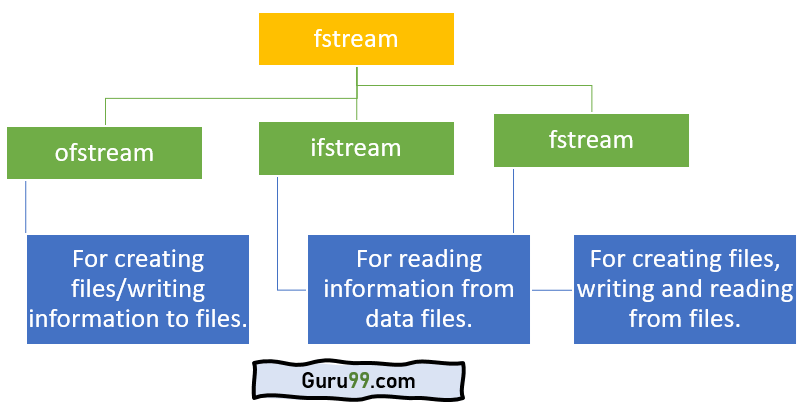

| Member Constant | Stands For |                                          Access                                          |
|:---------------:|:----------:|:----------------------------------------------------------------------------------------:|
|       in *      |    input   |       File open for reading: the internal stream buffer supports input operations.       |
|       out       |   output   |       File open for writing: the internal stream buffer supports output operations.      |
|      binary     |   binary   |                 Operations are performed in binary mode rather than text.                |
|       ate       |   at end   |                    The output position starts at the end of the file.                    |
|       app       |   append   | All output operations happen at the end of the file, appending to its existing contents. |
|      trunc      |  truncate  |          Any contents that existed in the file before it is open are discarded.          |

Default opening modes:

| ifstream |       ios::in       |
|:--------:|:-------------------:|
| ofstream |       ios::out      |
|  fstream | ios::in \| ios::out |


FILE IO Reference: [LINK](https://cplusplus.com/doc/tutorial/files/)



# stringstream in C++ and its Applications

A stringstream associates a string object with a stream allowing you to read from the string as if it were a stream (like cin). To use stringstream, we need to include sstream header file. The stringstream class is extremely useful in parsing input. 

Basic methods are:

1. clear()- To clear the stream.
2. str()- To get and set string object whose content is present in the stream. 
3. operator <<- Add a string to the stringstream object. 
4. operator >>- Read something from the stringstream object.

- Ex1: [LINK](../volansys_cpp_advanced/16_File_IO/sstream_count_words.cpp)
- Ex2: [LINK](../volansys_cpp_advanced/16_File_IO/sstream_frequency_of_words.cpp)
- Ex3: [LINK](../volansys_cpp_advanced/16_File_IO/sstream_int_to_str.cpp)
